Saving archive.zip to archive (5).zip
Colunas disponíveis: Index(['Station Name', 'Street Address', 'City', 'Access Days Time',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'New Georeferenced Column'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usa

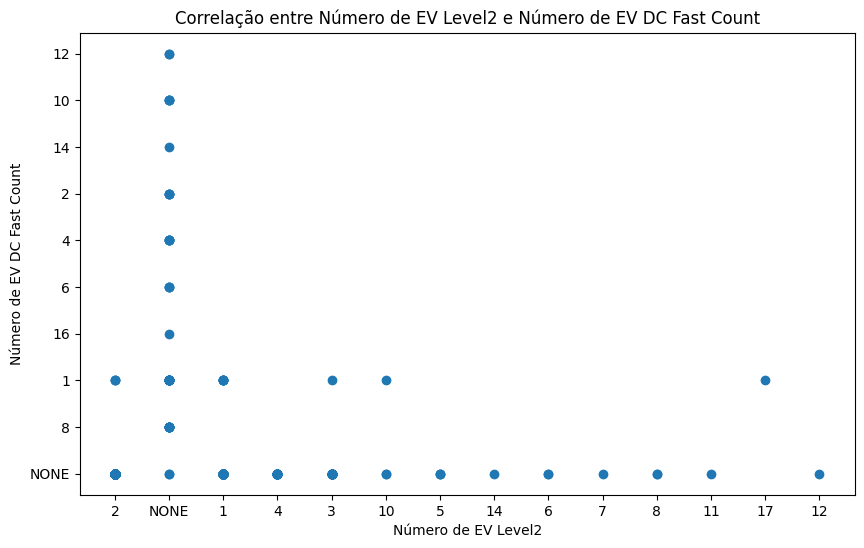

Mean Squared Error: 8.395918181818182
Previsão da Demanda: [1.07]


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Carregar o dataset de carregamento de veículos elétricos
# Dataset: https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-charging-stations-2024?select=Electric_Vehicle_Charging_Stations.csv
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded.keys())))

# Pré-processamento dos dados
# Remover valores ausentes e colunas irrelevantes
# Justificativa: Manter apenas os dados necessários para a análise e remover linhas com valores ausentes para garantir a integridade dos dados.
df.dropna(inplace=True)

# Análise exploratória dos dados
# Exibir as colunas disponíveis e informações do dataset para entender melhor os dados
print('Colunas disponíveis:', df.columns)
df.info()

# Visualização inicial dos dados
# Justificativa: Visualizar a relação entre diferentes atributos para entender possíveis correlações
plt.figure(figsize=(10, 6))
plt.scatter(df['EV Level2 EVSE Num'], df['EV DC Fast Count'])
plt.xlabel('Número de EV Level2')
plt.ylabel('Número de EV DC Fast Count')
plt.title('Correlação entre Número de EV Level2 e Número de EV DC Fast Count')
plt.show()

# Seleção de Features e Alvo
# Justificativa: Selecionar as features e o alvo para treinar o modelo de Machine Learning
# A coluna 'EV DC Fast Count' será o alvo (y), pois queremos prever o número de estações de carregamento rápido disponíveis
# Transformar colunas categóricas em variáveis dummy para permitir que o modelo as utilize
X = pd.get_dummies(df.drop(columns=['EV DC Fast Count']))
y = df['EV DC Fast Count'].replace('NONE', np.nan).dropna().astype(float)

# Dividir os dados em treino e teste
# Justificativa: Dividir os dados para avaliar o desempenho do modelo em dados não vistos
X_train, X_test, y_train, y_test = train_test_split(X.loc[y.index], y, test_size=0.2, random_state=42)

# Treinar um modelo de Machine Learning
# Justificativa: Utilizar o RandomForestRegressor, que é um modelo robusto para problemas de regressão e pode lidar bem com conjuntos de dados tabulares
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsão e Avaliação do Modelo
# Justificativa: Avaliar o desempenho do modelo usando o erro quadrático médio (MSE)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Conclusão: O valor do MSE nos dá uma ideia de quão preciso é o modelo. Um valor menor indica um melhor desempenho, enquanto um valor alto sugere que o modelo pode precisar de melhorias.

# Salvar o modelo treinado
# Justificativa: Salvar o modelo para uso futuro, permitindo previsões sem necessidade de re-treinar
joblib.dump(model, 'charging_demand_model.pkl')

# Função para prever demanda de carregamento com novos dados
# Justificativa: Criar uma função para prever a demanda com base em novos dados de entrada, permitindo a reutilização do modelo
# O uso de 'pd.get_dummies()' garante que as colunas categóricas sejam corretamente convertidas
# Reindexar para garantir que o input_data tenha as mesmas colunas que o modelo foi treinado

def prever_demanda(ev_level2_num, city):
    input_data = pd.DataFrame({'EV Level2 EVSE Num': [ev_level2_num], 'City': [city]})
    input_data = pd.get_dummies(input_data)
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    previsao = model.predict(input_data)
    return previsao

# Exemplo de previsão
# Justificativa: Testar a função de previsão para verificar o funcionamento do modelo
exemplo = prever_demanda(10, 'San Francisco')
print(f'Previsão da Demanda: {exemplo}')

# Conclusão Geral: Este modelo foi desenvolvido para prever a demanda de carregamento rápido de veículos elétricos. Os resultados iniciais mostram um valor de MSE que pode ser melhorado com mais ajustes no pré-processamento dos dados e na escolha das features. O próximo passo seria melhorar a qualidade dos dados e testar diferentes modelos para obter um desempenho melhor.
